In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime as dt

In [2]:
df=pd.read_excel("C:\\Users\\md kaif\\Downloads\\data sets-20221130T050826Z-001\\data sets\\Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.columns.unique()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [9]:
for i in df.columns:
    print(i,"-----------------------",df[i].unique())

Airline ----------------------- ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ----------------------- ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ----------------------- ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ----------------------- ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' '

In [10]:
df["Total_Stops"].fillna(df["Total_Stops"].mode()[0],inplace=True)

In [11]:
df["Total_Stops"].isnull().sum()

0

In [12]:
df["Route"].fillna(df["Route"].mode()[0],inplace=True)

In [13]:
df["Route"].isnull().sum()

0

In [14]:
df["Destination"]=df["Destination"].replace("Delhi","New Delhi")

In [15]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [16]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [18]:

# Extracting  day 
df["day_of_journey"] = df["Date_of_Journey"].dt.day

# Extracting month
df["month_of_journey"] = df["Date_of_Journey"].dt.month

## Extracting  departure Hours
df["Dep_hour"] = df["Dep_Time"].dt.hour

# Extracting departure Minutes
df["Dep_min"] = df["Dep_Time"].dt.minute

## Extracting  arrival Hours
df["arrival_hour"] = df["Arrival_Time"].dt.hour

# Extracting arrival Minutes
df["arrival_min"] = df["Arrival_Time"].dt.minute


In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-12-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-15 05:50:00,2022-12-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-15 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-12-15 18:05:00,2022-12-15 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-12-15 16:50:00,2022-12-15 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
df.drop(columns=["Dep_Time","Arrival_Time","Date_of_Journey"],inplace=True)

In [21]:
eval("2+5")

7

In [22]:
df["Duration"]=df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [25]:
df.Total_Stops.unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:>

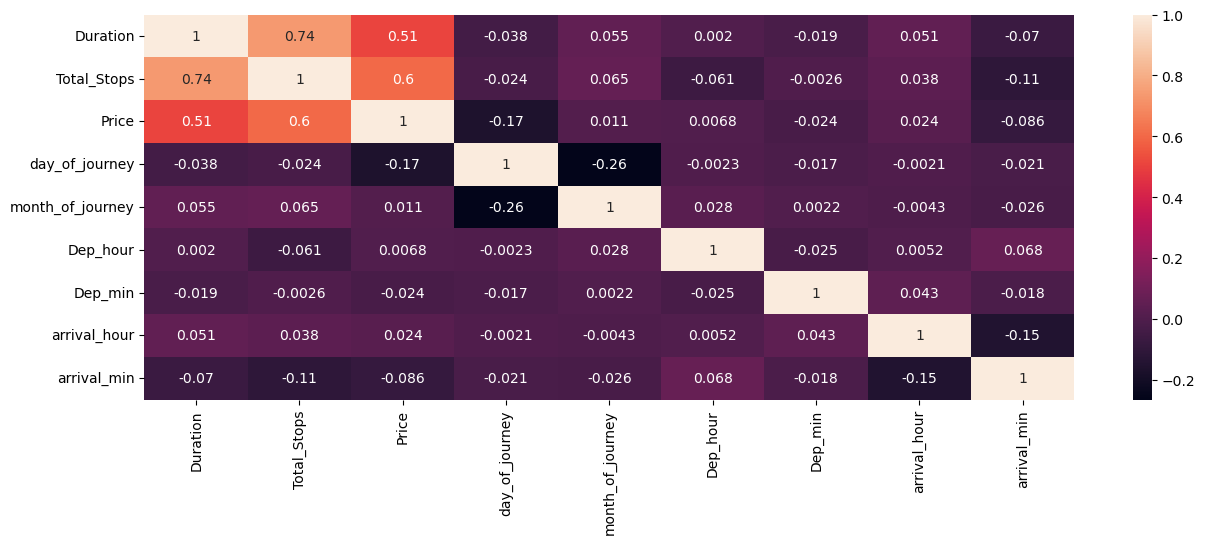

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10683.0,643.093232,507.862001,5.0,170.0,520.0,930.0,2860.0
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
day_of_journey,10683.0,12.682205,8.803701,3.0,5.0,6.0,21.0,27.0
month_of_journey,10683.0,5.534775,2.987489,1.0,3.0,5.0,6.0,12.0
Dep_hour,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
arrival_hour,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0


In [28]:
df.Duration.unique()

array([ 170,  445, 1140,  325,  285,  145,  930, 1265, 1530,  470,  795,
        155,  135,  730, 1595,  270, 1355, 1380, 1235,  310,  920,  175,
        800,  910,  345,  355,  805, 1320,  330,  625,  315,  150,  375,
        715,  665,  510, 1325,  165,  720,  965, 1195,  195, 1520,  180,
        975,  905,  390, 1505,  745, 1640,  615,  630,   90,   85, 1590,
        440,  810,  300, 1145,  890,  160, 1330,  575,  600, 1280, 1125,
        740, 1080,  555, 1050,  995,  735,  450, 1440,  535,  430,  870,
       1820,  900,  765,  610,  925,  845, 1215, 1390, 1090,  960,  140,
        480, 1015,  190,  840, 1430, 1300, 1275,  650,  495,  515,  710,
       1655,  505, 1255,  290,  490, 1465, 1415, 1545, 1570, 1730, 1515,
        560,  550,  185,  690,  570, 1055,  305, 1550, 1200,  780, 1105,
       1450,  295, 1535,  380, 1120, 1165, 1760,  545,  645,  700, 1375,
       2245, 1540,  835,  520, 1410,  755, 1455,   80,  660,  675,  875,
        775,  540,  460,  705, 1495, 1025, 1795, 13

In [29]:
df[df["Total_Stops"]==2]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,6,9,9,25,4,25
15,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,1595,2,No info,14011,3,3,16,40,19,15
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,1380,2,No info,13381,6,12,20,15,19,15
25,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,910,2,No info,13292,6,9,21,25,12,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,440,2,No info,21219,5,9,11,40,19,0
10670,Air India,Kolkata,Banglore,CCU → IXR → DEL → BLR,1045,2,No info,11411,5,12,5,50,23,15
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,1195,2,In-flight meal not included,11150,27,6,23,5,19,0
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,900,2,No info,16704,27,5,13,25,4,25


In [30]:
df[(df["Source"]=="Mumbai")&(df["Destination"]=="Hyderabad")&(df["Total_Stops"]==2)]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
597,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,1775,2,No info,25139,3,6,9,40,15,15
1417,Air India,Mumbai,Hyderabad,BOM → AMD → ISK → HYD,795,2,No info,9977,3,12,1,35,14,50
1424,Jet Airways,Mumbai,Hyderabad,BOM → DED → DEL → HYD,1590,2,No info,24115,3,6,14,20,16,50
1784,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,1995,2,No info,14219,3,6,6,0,15,15
1824,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,845,2,No info,22619,3,6,9,40,23,45
2857,Air India,Mumbai,Hyderabad,BOM → COK → MAA → HYD,990,2,No info,9678,3,6,5,30,22,0
3294,Jet Airways,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,1665,2,No info,21375,3,6,13,5,16,50
3821,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,255,2,No info,16172,3,12,21,10,16,55
4402,Air India,Mumbai,Hyderabad,BOM → AMD → ISK → HYD,560,2,No info,13757,3,6,5,30,14,50
4659,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,1795,2,No info,14219,3,6,6,0,11,55


In [31]:
df[(df["Source"]=="Mumbai")&(df["Destination"]=="Hyderabad")&(df["Total_Stops"]==2)]


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
597,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,1775,2,No info,25139,3,6,9,40,15,15
1417,Air India,Mumbai,Hyderabad,BOM → AMD → ISK → HYD,795,2,No info,9977,3,12,1,35,14,50
1424,Jet Airways,Mumbai,Hyderabad,BOM → DED → DEL → HYD,1590,2,No info,24115,3,6,14,20,16,50
1784,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,1995,2,No info,14219,3,6,6,0,15,15
1824,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,845,2,No info,22619,3,6,9,40,23,45
2857,Air India,Mumbai,Hyderabad,BOM → COK → MAA → HYD,990,2,No info,9678,3,6,5,30,22,0
3294,Jet Airways,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,1665,2,No info,21375,3,6,13,5,16,50
3821,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,255,2,No info,16172,3,12,21,10,16,55
4402,Air India,Mumbai,Hyderabad,BOM → AMD → ISK → HYD,560,2,No info,13757,3,6,5,30,14,50
4659,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,1795,2,No info,14219,3,6,6,0,11,55


<AxesSubplot:>

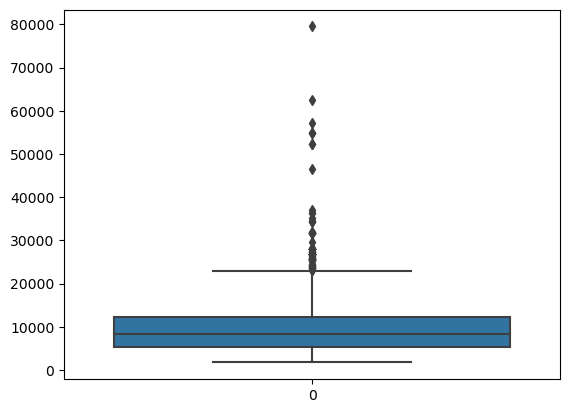

In [32]:
sns.boxplot(df["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

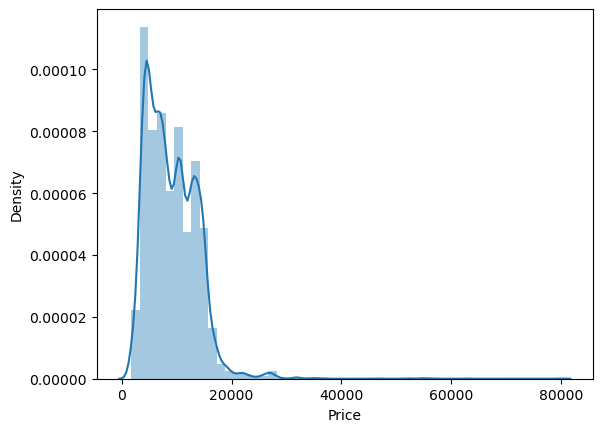

In [33]:
sns.distplot(df["Price"])

In [34]:
df["Price"].agg(["min","mean","max"])

min      1759.000000
mean     9087.064121
max     79512.000000
Name: Price, dtype: float64

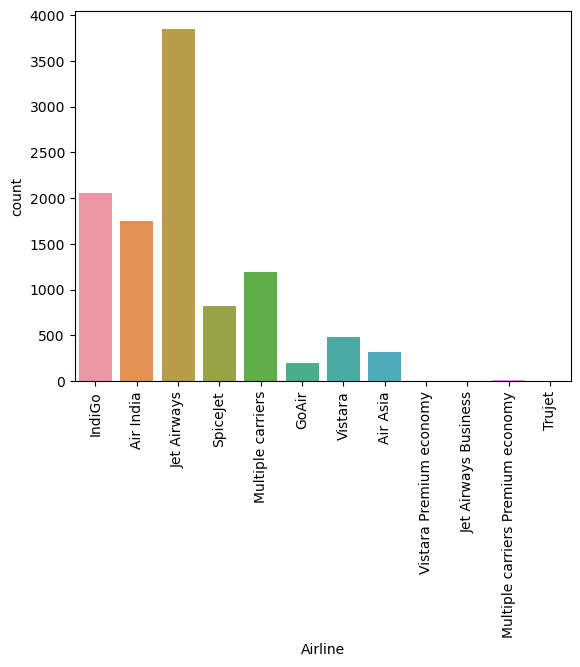

In [35]:
plt.xticks(rotation=90)
sns.countplot(x="Airline",data=df);

In [36]:
df.groupby(["Airline"])["Price"].agg(["min","max"])

,min,max
Airline,,
Air Asia,3383,13774
Air India,2050,31945
GoAir,3398,22794
IndiGo,2227,22153
Jet Airways,1840,54826
Jet Airways Business,46490,79512
Multiple carriers,5797,36983
Multiple carriers Premium economy,9845,14629
SpiceJet,1759,23267


<AxesSubplot:xlabel='Airline', ylabel='Price'>

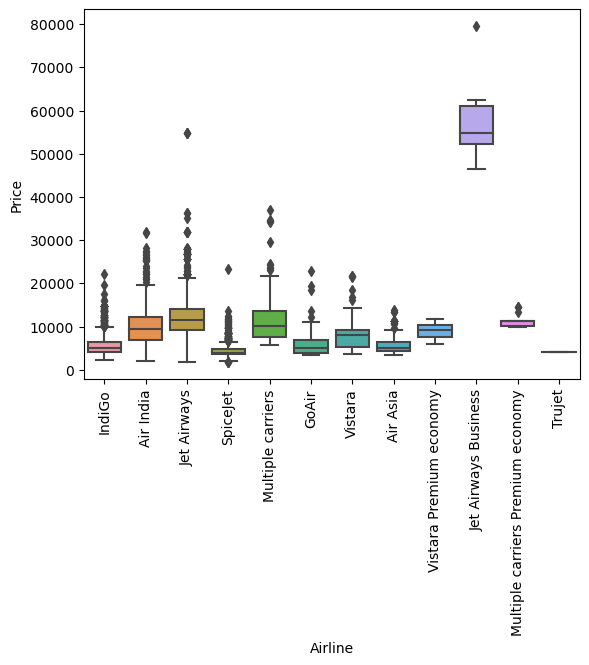

In [37]:
plt.xticks(rotation=90)
sns.boxplot(x="Airline",y="Price",data=df)

In [38]:
df[df["Airline"]=="Jet Airways Business"]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,300,1,No info,52229,3,1,5,45,10,45
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,340,1,Business class,79512,3,1,5,45,11,25
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,400,1,Business class,62427,3,1,5,45,12,25
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500,2,No info,46490,3,3,20,5,4,25
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500,2,No info,52285,3,6,20,5,4,25
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,280,1,Business class,57209,3,1,9,45,14,25


In [39]:
## Details Of The Cheapest Airline
df[df["Airline"]=="Trujet"]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,195,1,No info,4140,3,6,13,5,16,20


In [40]:
## How MAny Flights With Respect To Stoppage
df[df["Total_Stops"]==4]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
9182,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,1770,4,Change airports,17686,3,1,5,50,11,20


In [41]:
## Find The Fights With respect To Stoppages
df.groupby(["Airline"])["Total_Stops"].value_counts()

Airline                            Total_Stops
Air Asia                           0               181
                                   1               129
                                   2                 9
Air India                          2               756
                                   1               541
                                   0               417
                                   3                37
                                   4                 1
GoAir                              1               102
                                   0                92
IndiGo                             0              1241
                                   1               793
                                   2                19
Jet Airways                        1              2535
                                   2               691
                                   0               623
Jet Airways Business               1                 4
                  

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

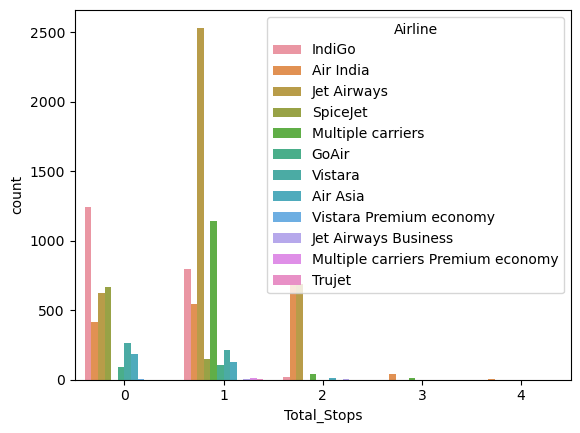

In [42]:
sns.countplot(x="Total_Stops",hue="Airline",data=df)

<AxesSubplot:xlabel='Airline', ylabel='Total_Stops'>

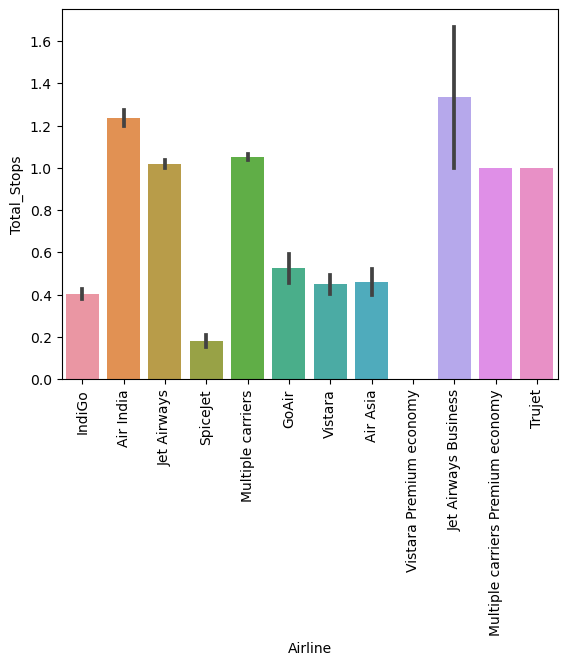

In [43]:
plt.xticks(rotation=90)
sns.barplot(x="Airline",y="Total_Stops",data=df)

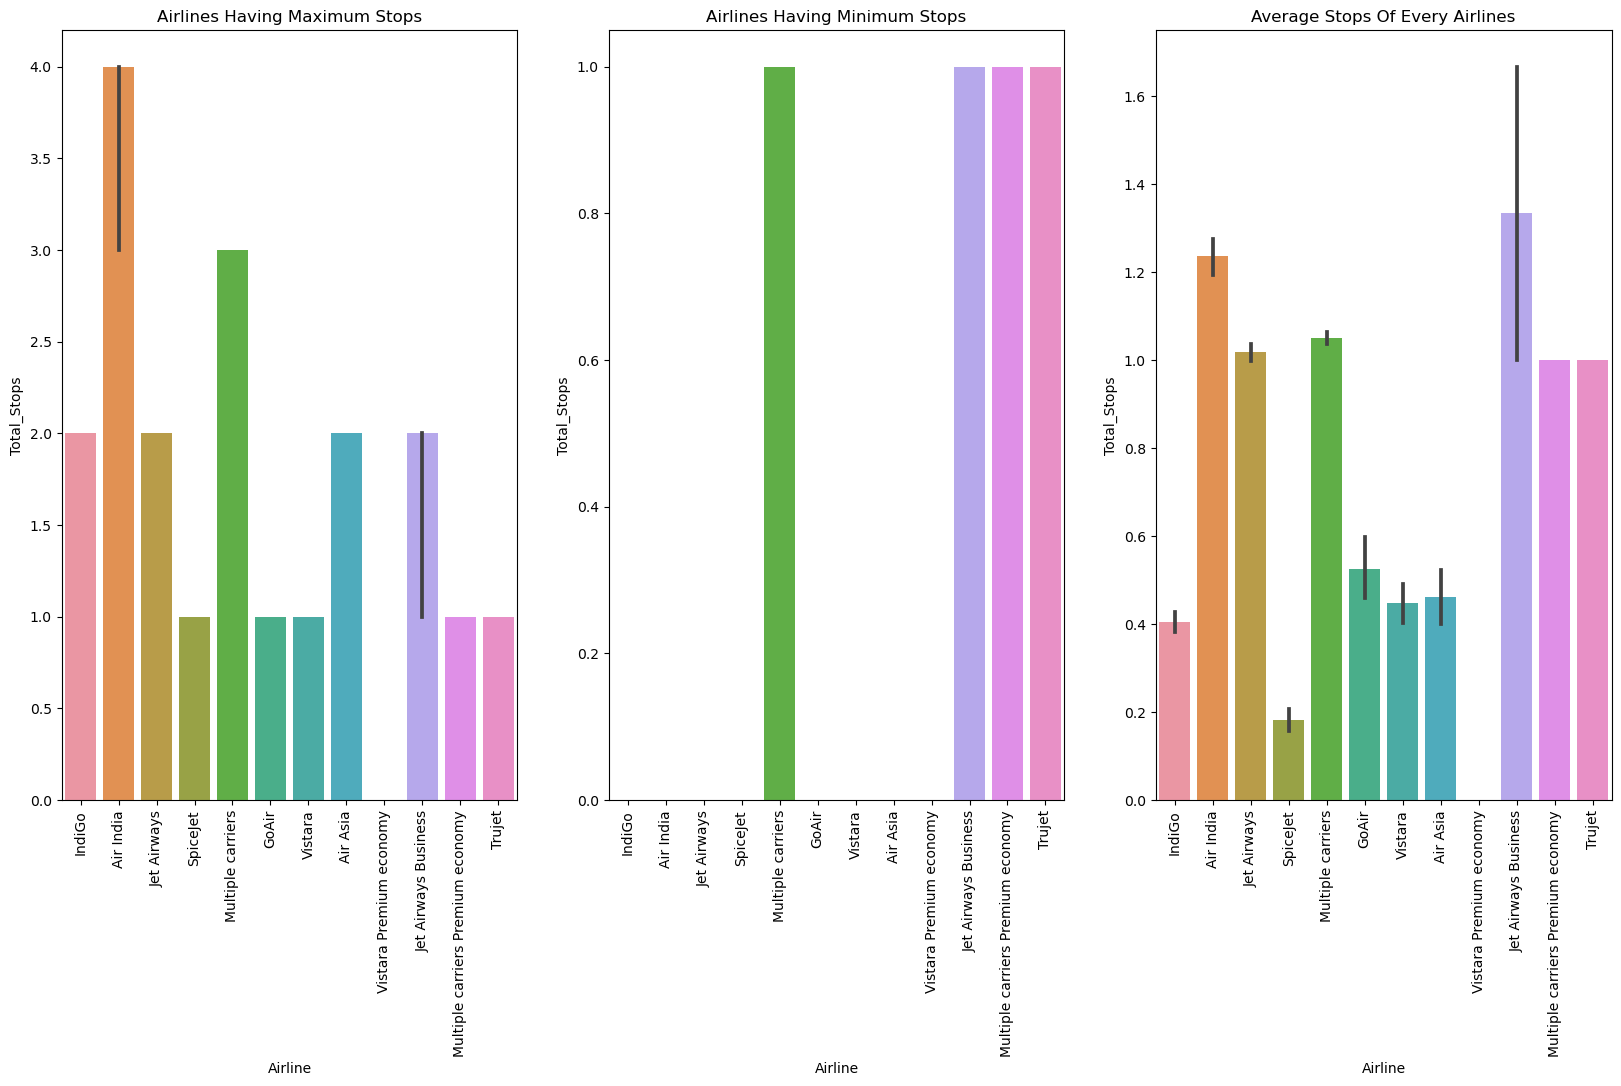

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
plt.title("Airlines Having Maximum Stops")
sns.barplot(x="Airline",y="Total_Stops",data=df,estimator=max)
plt.subplot(1,3,2)
plt.xticks(rotation=90)
plt.title("Airlines Having Minimum Stops")
sns.barplot(x="Airline",y="Total_Stops",data=df,estimator=min)
plt.subplot(1,3,3)
plt.xticks(rotation=90)
plt.title("Average Stops Of Every Airlines")
sns.barplot(x="Airline",y="Total_Stops",data=df);

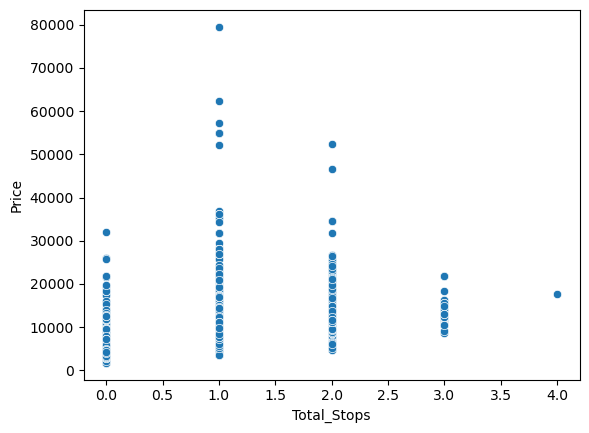

In [45]:
sns.scatterplot(x="Total_Stops",y="Price",data=df);

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

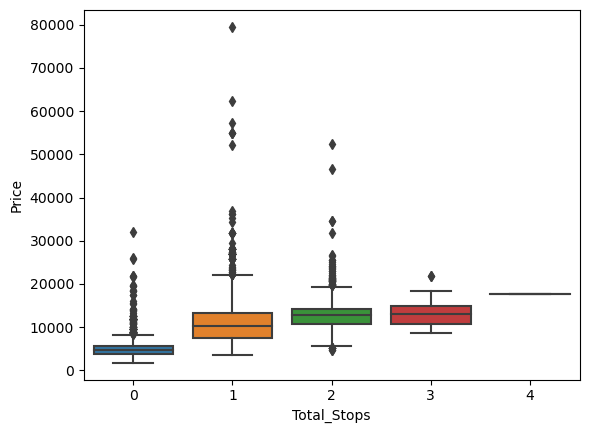

In [46]:
sns.boxplot(x="Total_Stops",y="Price",data=df)

In [47]:
df.groupby(["Source","Destination"])["Airline"].value_counts()

Source    Destination  Airline                          
Banglore  New Delhi    Jet Airways                           788
                       IndiGo                                523
                       Air India                             332
                       Vistara                               185
                       SpiceJet                              181
                       GoAir                                  93
                       Air Asia                               89
                       Jet Airways Business                    4
                       Vistara Premium economy                 2
Chennai   Kolkata      IndiGo                                184
                       SpiceJet                              128
                       Vistara                                43
                       Air India                              25
                       Vistara Premium economy                 1
Delhi     Cochin       Jet Airway

In [48]:
## Find Max Minimum and Avergae Flights from Source To Destination
k=df.groupby(["Source","Destination","Airline"])["Price"].agg(["min","max","mean"])
k.reset_index(inplace=True)
k

,Source,Destination,Airline,min,max,mean
0,Banglore,New Delhi,Air Asia,3383,10873,4574.280899
1,Banglore,New Delhi,Air India,3758,31783,9238.198795
2,Banglore,New Delhi,GoAir,3398,18558,4948.881720
3,Banglore,New Delhi,IndiGo,3359,22153,5274.112811
4,Banglore,New Delhi,Jet Airways,3359,54826,11021.732234
5,Banglore,New Delhi,Jet Airways Business,52229,79512,62844.250000
6,Banglore,New Delhi,SpiceJet,3257,23267,4550.292818
7,Banglore,New Delhi,Vistara,4353,21730,6182.172973
8,Banglore,New Delhi,Vistara Premium economy,5969,11793,8881.000000
9,Chennai,Kolkata,Air India,3145,19630,5895.640000


In [49]:
z=k[k["Source"]=="Banglore"]
z

,Source,Destination,Airline,min,max,mean
0,Banglore,New Delhi,Air Asia,3383,10873,4574.280899
1,Banglore,New Delhi,Air India,3758,31783,9238.198795
2,Banglore,New Delhi,GoAir,3398,18558,4948.881720
3,Banglore,New Delhi,IndiGo,3359,22153,5274.112811
4,Banglore,New Delhi,Jet Airways,3359,54826,11021.732234
5,Banglore,New Delhi,Jet Airways Business,52229,79512,62844.250000
6,Banglore,New Delhi,SpiceJet,3257,23267,4550.292818
7,Banglore,New Delhi,Vistara,4353,21730,6182.172973
8,Banglore,New Delhi,Vistara Premium economy,5969,11793,8881.000000


<AxesSubplot:title={'center':'Maximum Price Of All Airlines From Banglore To Delhi'}, xlabel='Airline', ylabel='max'>

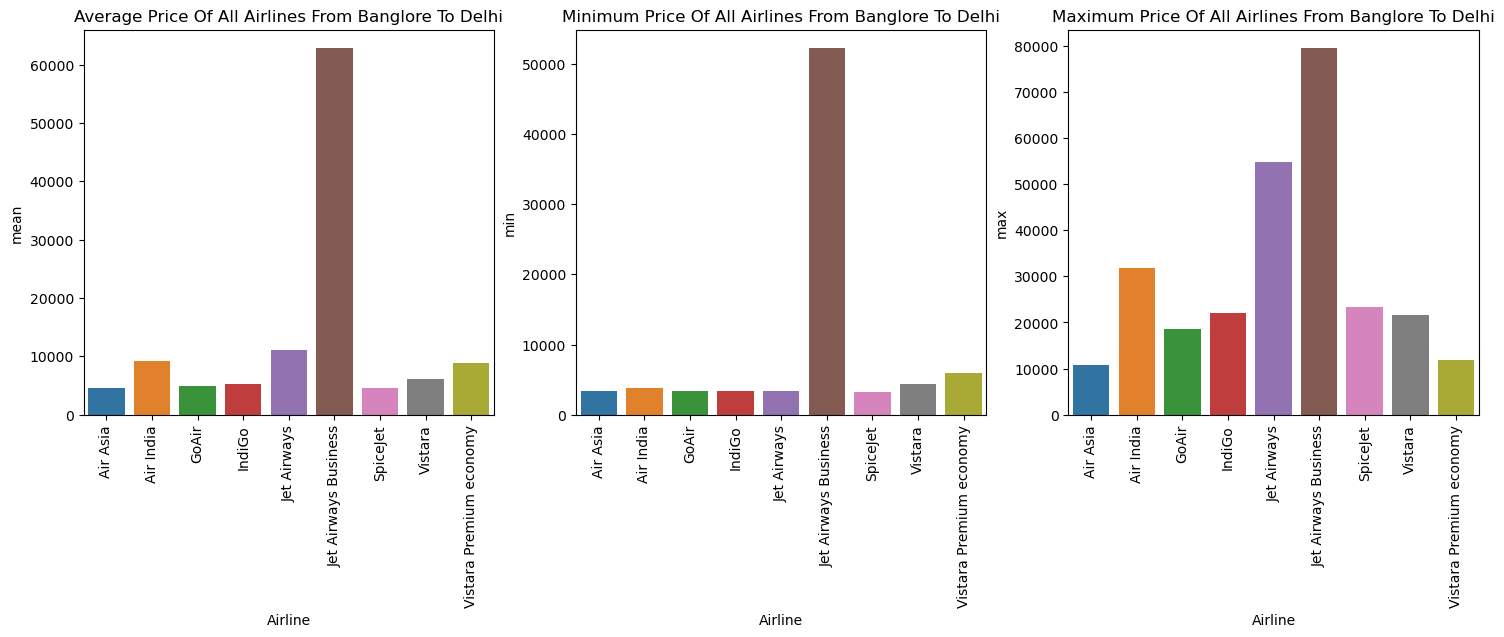

In [50]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
plt.title("Average Price Of All Airlines From Banglore To Delhi")
sns.barplot(x="Airline",y="mean",data=z)
plt.subplot(1,3,2)
plt.xticks(rotation=90)
plt.title("Minimum Price Of All Airlines From Banglore To Delhi")
sns.barplot(x="Airline",y="min",data=z)
plt.subplot(1,3,3)
plt.xticks(rotation=90)
plt.title("Maximum Price Of All Airlines From Banglore To Delhi")
sns.barplot(x="Airline",y="max",data=z)

In [52]:
kolkata=k[k["Source"]=="Kolkata"]
kolkata

,Source,Destination,Airline,min,max,mean
24,Kolkata,Banglore,Air Asia,3782,11323,5012.320000
25,Kolkata,Banglore,Air India,4145,31945,10357.324219
26,Kolkata,Banglore,GoAir,3514,10586,7047.000000
27,Kolkata,Banglore,IndiGo,3480,12198,5075.235955
28,Kolkata,Banglore,Jet Airways,5608,15149,11717.565287
29,Kolkata,Banglore,SpiceJet,3815,12287,4642.883333
30,Kolkata,Banglore,Vistara,7770,16932,9257.683060


<AxesSubplot:title={'center':'Maximum Price Of All Airlines From Kolkata To Banglore'}, xlabel='Airline', ylabel='max'>

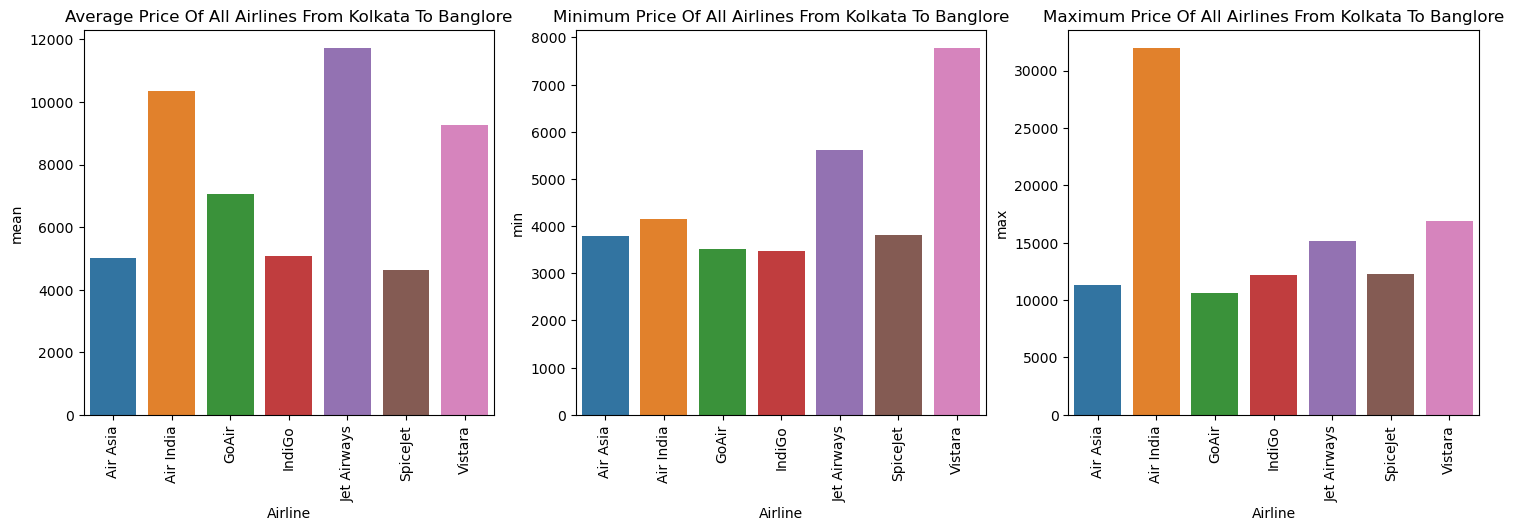

In [53]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
plt.title("Average Price Of All Airlines From Kolkata To Banglore")
sns.barplot(x="Airline",y="mean",data=kolkata)
plt.subplot(1,3,2)
plt.xticks(rotation=90)
plt.title("Minimum Price Of All Airlines From Kolkata To Banglore")
sns.barplot(x="Airline",y="min",data=kolkata)
plt.subplot(1,3,3)
plt.xticks(rotation=90)
plt.title("Maximum Price Of All Airlines From Kolkata To Banglore")
sns.barplot(x="Airline",y="max",data=kolkata)

## Variation Of Price By Source

<AxesSubplot:title={'center':'Variation Of Price By Source'}, xlabel='Source', ylabel='Price'>

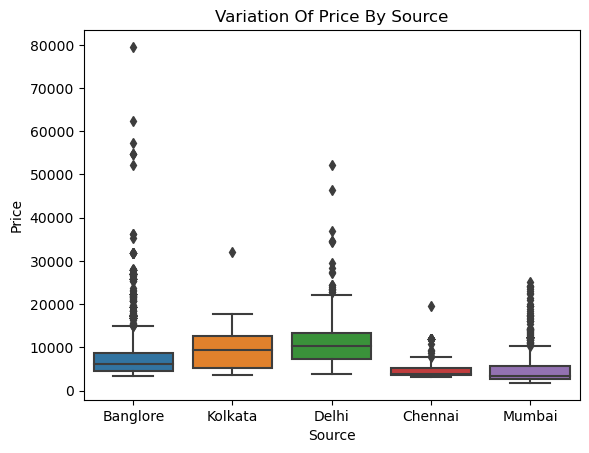

In [56]:
plt.title("Variation Of Price By Source")
sns.boxplot(x="Source",y="Price",data=df)

## Variation Of Price By Destination

<AxesSubplot:title={'center':'Variation Of Price By Destination'}, xlabel='Destination', ylabel='Price'>

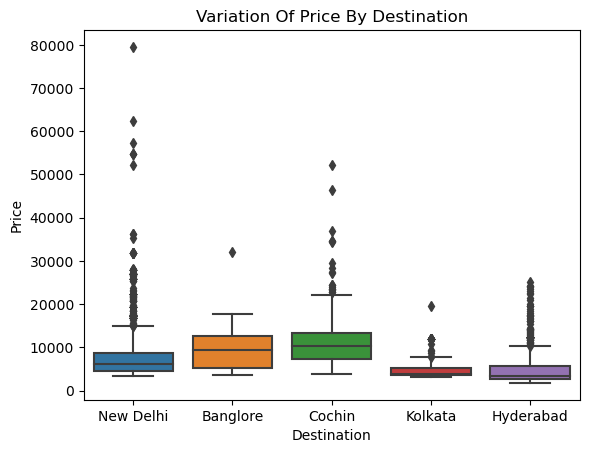

In [57]:
plt.title("Variation Of Price By Destination")
sns.boxplot(x="Destination",y="Price",data=df)

## ON Which Month Have maximum Flights Taken Off

<AxesSubplot:xlabel='month_of_journey', ylabel='count'>

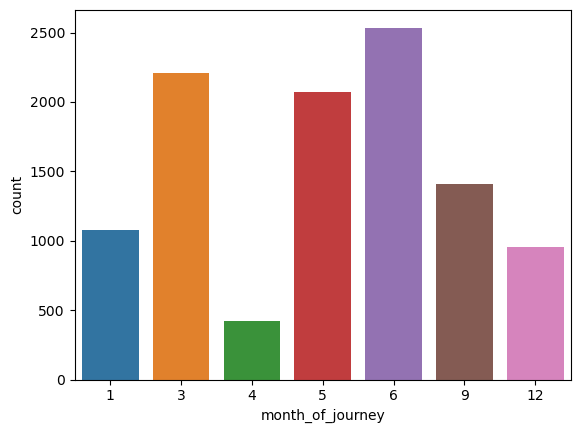

In [59]:
sns.countplot(x="month_of_journey",data=df)

## Peak Business Month

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

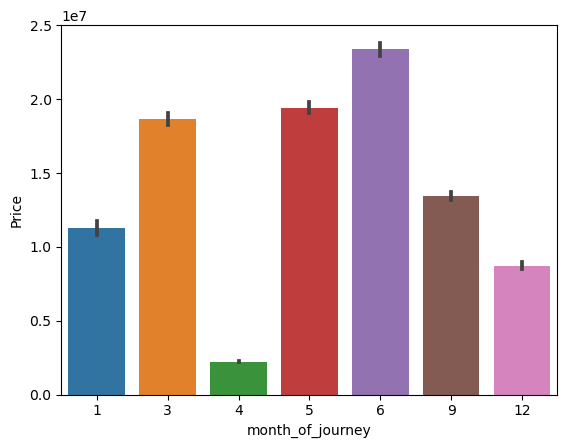

In [60]:
sns.barplot(x="month_of_journey",y="Price",data=df,estimator=sum)

## Average Business Of All Airlines

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

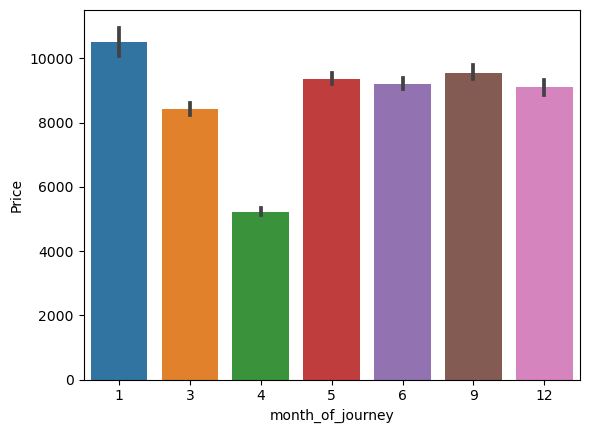

In [62]:
sns.barplot(x="month_of_journey",y="Price",data=df)

## Which Flights Taken of in Which Month

TypeError: 'list' object is not callable

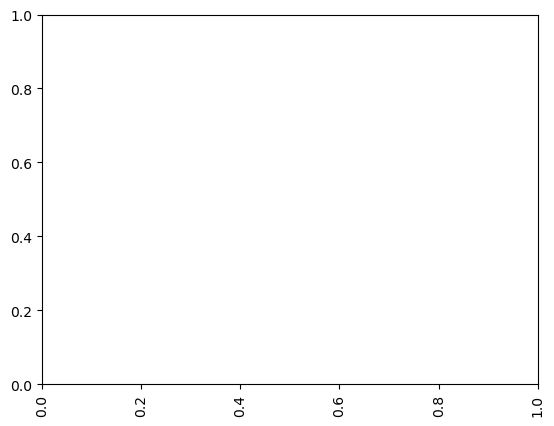

In [67]:

plt.xticks(rotation=90)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.scatter(x="Airline",y="month_of_journey",data=df)

## How Many Flights Taken Off In Each Month

In [69]:
df.groupby(["month_of_journey"])["Airline"].value_counts()

month_of_journey  Airline          
1                 Jet Airways          430
                  Air India            197
                  IndiGo               184
                  SpiceJet              76
                  Multiple carriers     75
                                      ... 
12                Multiple carriers     65
                  SpiceJet              54
                  Vistara               52
                  Air Asia              29
                  GoAir                 12
Name: Airline, Length: 64, dtype: int64

<AxesSubplot:xlabel='month_of_journey', ylabel='count'>

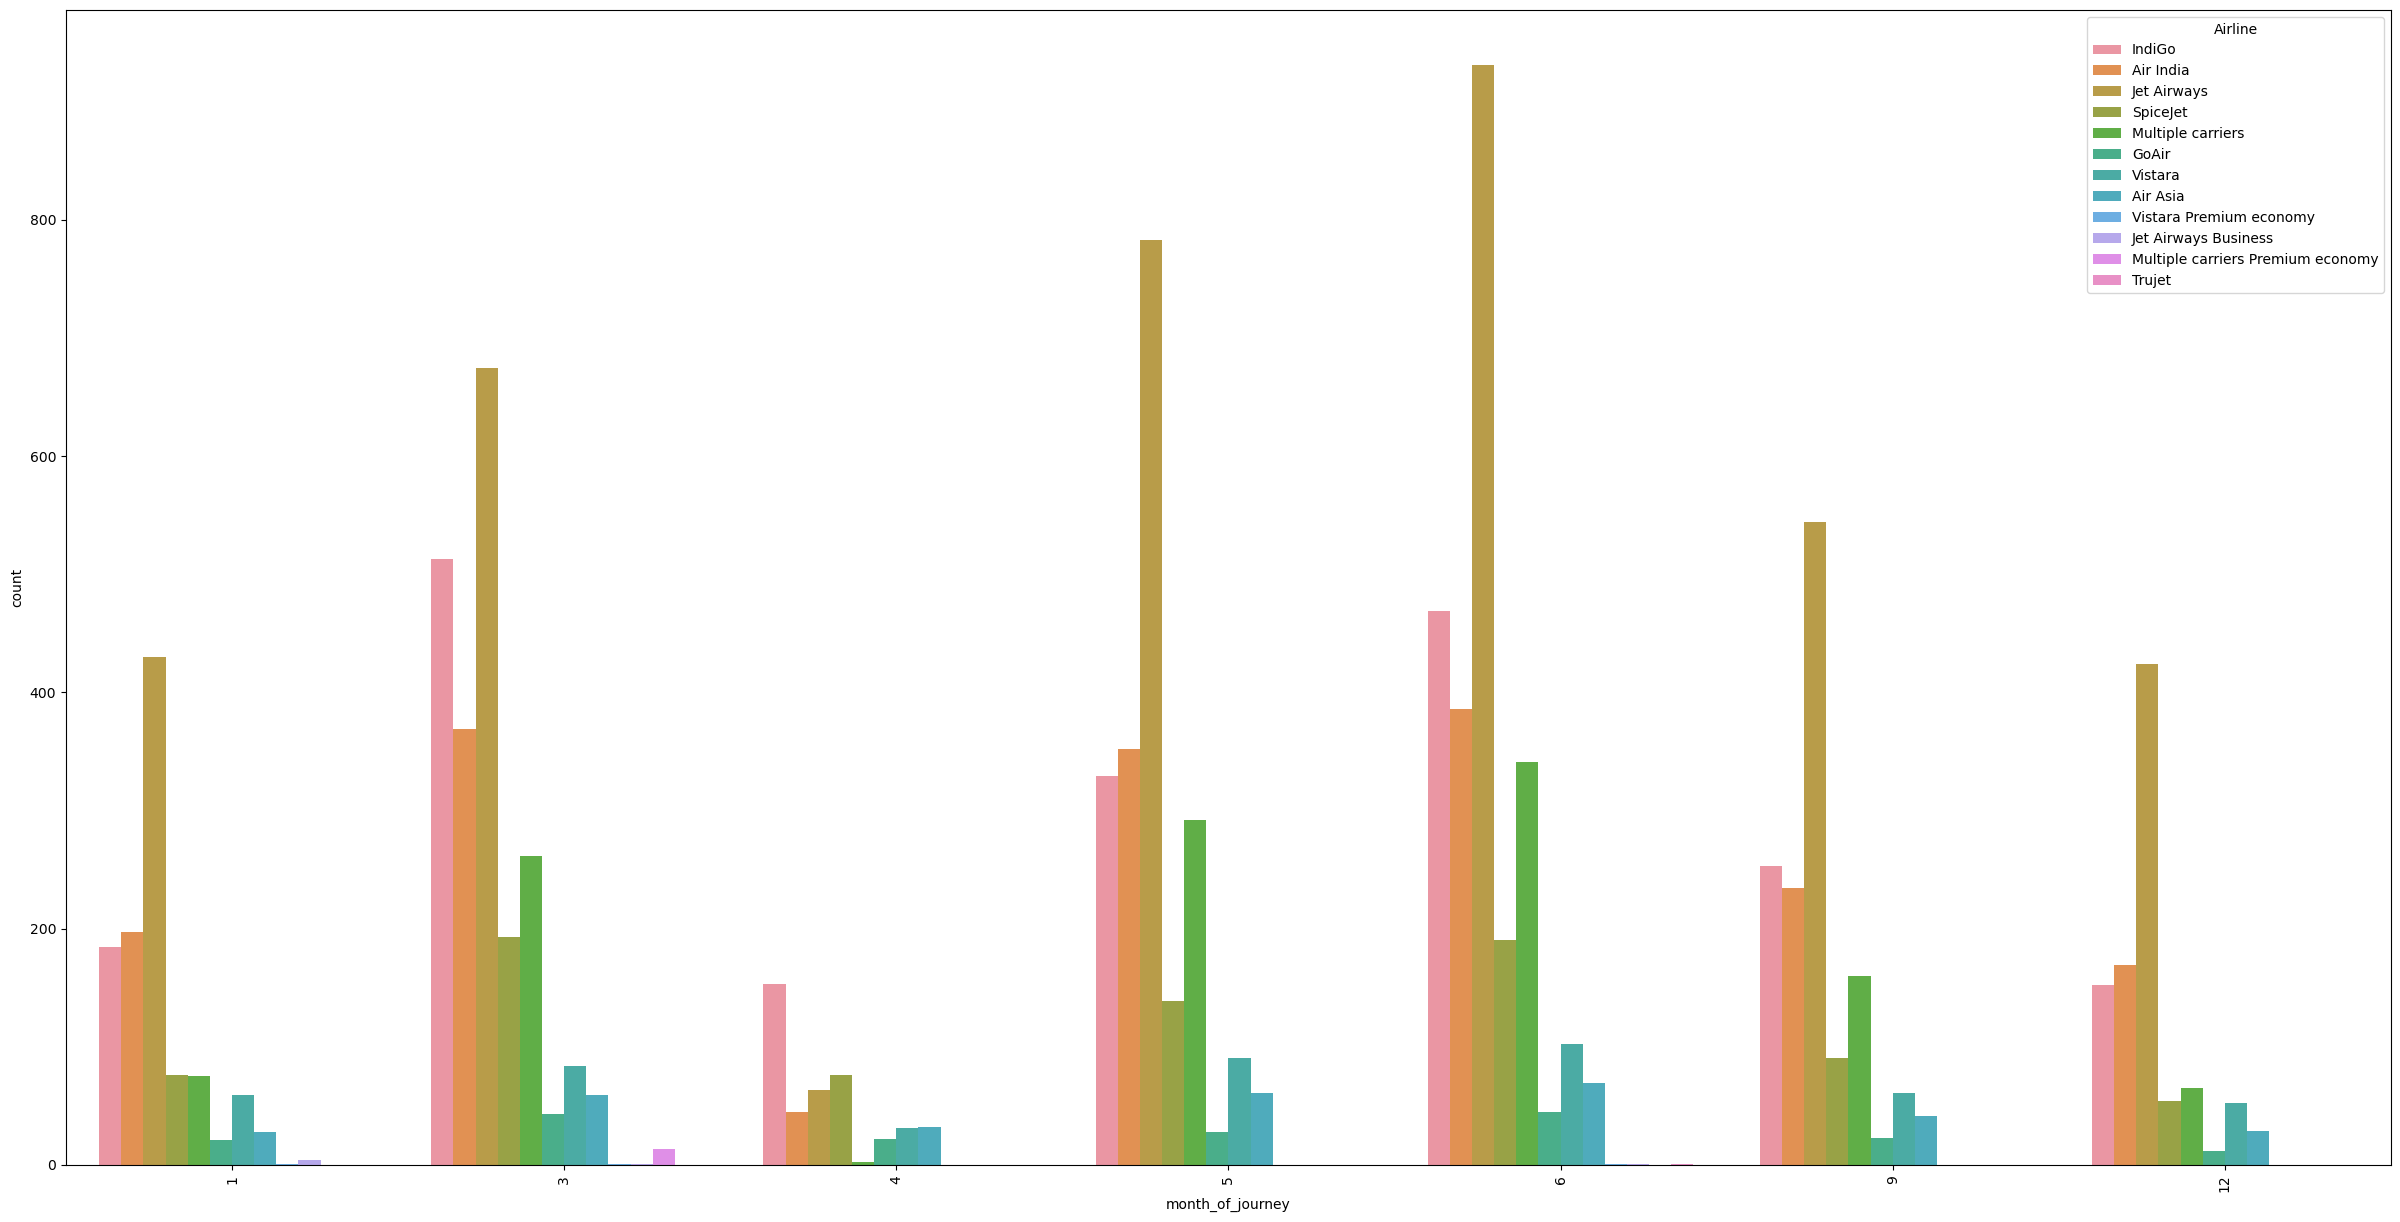

In [71]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
sns.countplot(x="month_of_journey",hue="Airline",data=df)

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

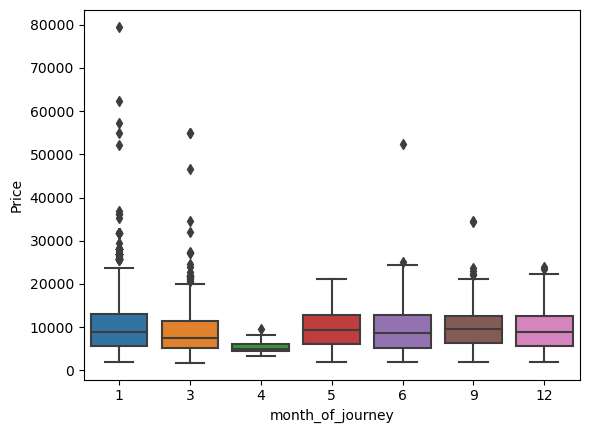

In [72]:
sns.boxplot(x="month_of_journey",y="Price",data=df)

## Which Was the Peak Day

In [73]:
df["day_of_journey"].value_counts()

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: day_of_journey, dtype: int64

Text(0.5, 0, 'Day of Journey')

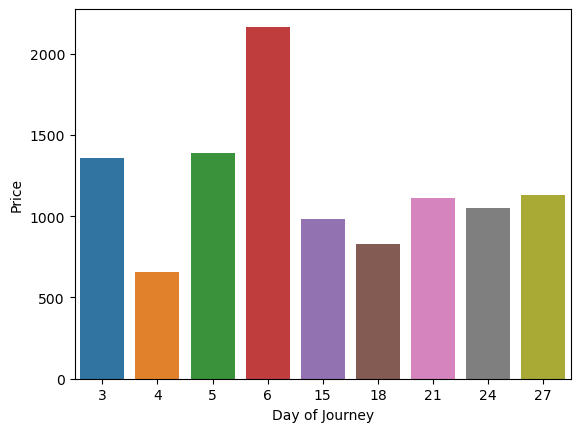

In [79]:

sns.countplot(x="day_of_journey",data=df)
plt.ylabel("Price")
plt.xlabel("Day of Journey")

<AxesSubplot:xlabel='day_of_journey', ylabel='Price'>

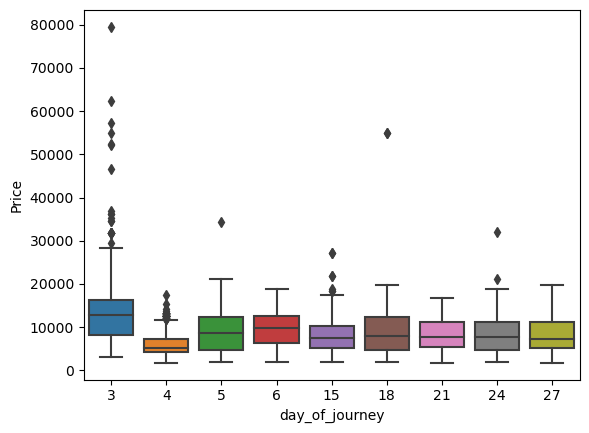

In [80]:
sns.boxplot(x="day_of_journey",y="Price",data=df)

## What Was The Peak Departure Time

In [83]:
df["Dep_hour"].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

<AxesSubplot:xlabel='Dep_hour', ylabel='count'>

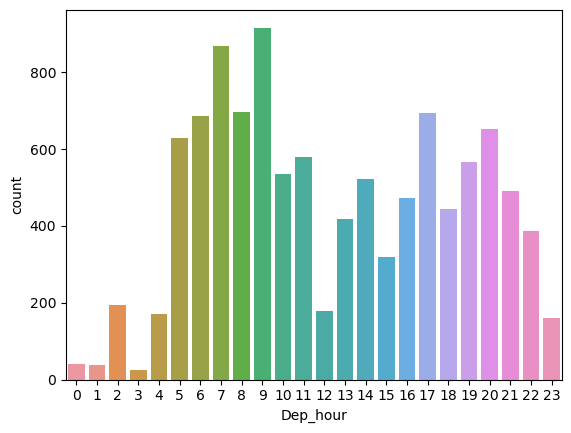

In [84]:
sns.countplot(x="Dep_hour",data=df)

In [85]:
df.groupby(["Airline"])["Dep_hour"].value_counts()

Airline                  Dep_hour
Air Asia                 7           53
                         22          39
                         19          37
                         16          33
                         23          33
                                     ..
Vistara                  10           1
                         12           1
Vistara Premium economy  7            1
                         11           1
                         16           1
Name: Dep_hour, Length: 149, dtype: int64

<AxesSubplot:xlabel='Dep_hour', ylabel='count'>

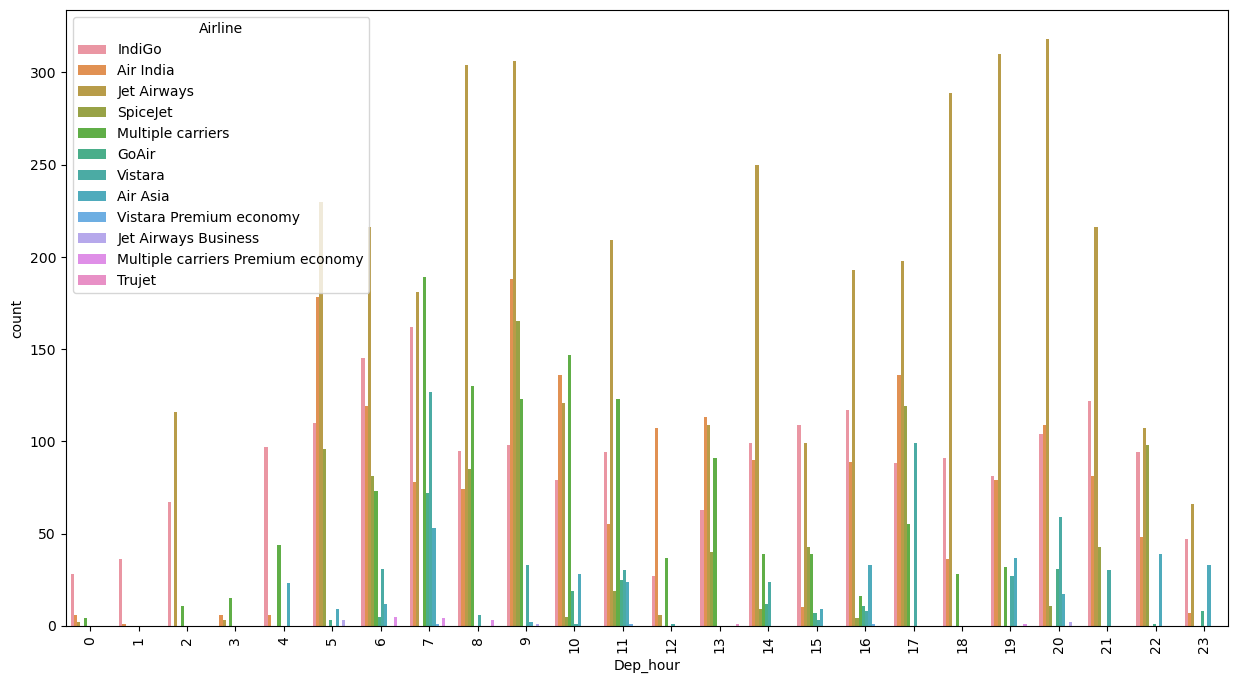

In [89]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="Dep_hour",hue="Airline",data=df)

In [90]:
df.groupby(["Source","Airline"])["Dep_hour"].value_counts()

Source    Airline    Dep_hour
Banglore  Air Asia   23          33
                     11          24
                     4           23
                     5            9
          Air India  6           53
                                 ..
Mumbai    Vistara    11           2
                     20           2
                     10           1
                     14           1
                     19           1
Name: Dep_hour, Length: 308, dtype: int64

<AxesSubplot:xlabel='Dep_hour', ylabel='count'>

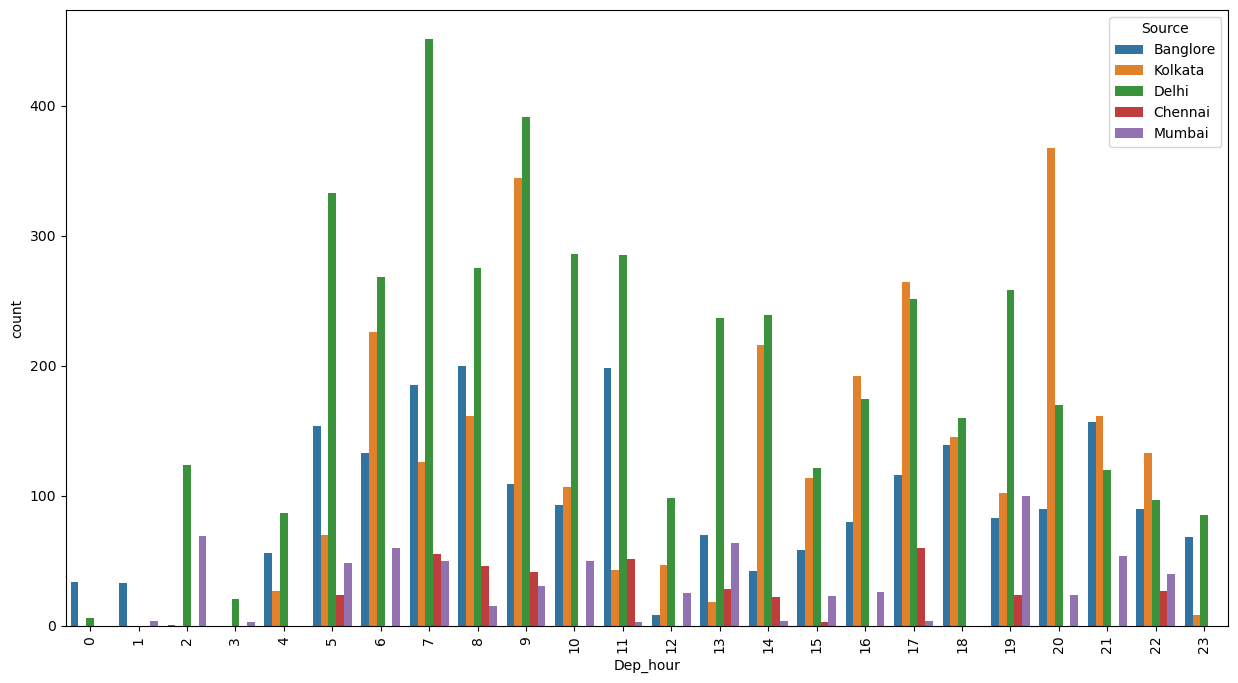

In [97]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="Dep_hour",hue="Source",data=df)

In [95]:
df.groupby(["Destination","Airline"])["arrival_hour"].value_counts()

Destination  Airline                  arrival_hour
Banglore     Air Asia                 22              34
                                      1               30
                                      12              30
                                      23              24
                                      10              21
                                                      ..
New Delhi    Vistara                  18               8
                                      10               4
                                      21               3
             Vistara Premium economy  14               1
                                      18               1
Name: arrival_hour, Length: 279, dtype: int64

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="Dep_hour",hue="Source",data=df)